In [8]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

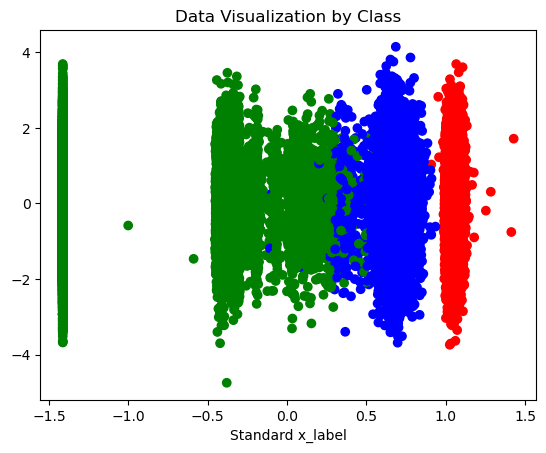

In [2]:
# file_path = 'D:\\Dataset\\#4_전력 설비 에너지 패턴 및 고장 분석 센서\\Training\\1.펌프_일반모터\\2.SOH진단\\1.역률평균\\0.Combined\\'
# files = ['Combined_LabelledData_346_역률평균.json', 'Combined_LabelledData_348_역률평균.json']

# x_label = []
# y_label = []

# for file_name in files:
#     full_path = file_path + file_name
#     with open(full_path, 'r', encoding='utf-8') as file:
#         data = json.load(file)

#     for entry in data['data']:
#         if entry['ITEM_NAME'] == "역률평균":
#             x_label.append(entry['ITEM_VALUE'])
#             y_label.append(entry['LABEL_NAME'])


# print(x_label)

file_path = 'D:\\Dataset\\#4_전력 설비 에너지 패턴 및 고장 분석 센서\\Training\\1.펌프_일반모터\\2.SOH진단\\1.역률평균\\0.Combined\\'
files = ['Combined_LabelledData_346_역률평균.json', 'Combined_LabelledData_348_역률평균.json']

x_label = []
y_label = []

for file_name in files:
    full_path = file_path + file_name
    with open(full_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    for entry in data['data']:
        if entry['ITEM_NAME'] == "역률평균":
            x_label.append(entry['ITEM_VALUE'])
            y_label.append(entry['LABEL_NAME'])

x_label = np.array(x_label)
x_label_scaled = (x_label - np.mean(x_label)) / np.std(x_label)

colors = {'정상': 'red', '경고': 'green', '주의': 'blue'}

plt.scatter(x_label_scaled, np.random.randn(len(x_label_scaled)), c=[colors[label] for label in y_label])
plt.xlabel('Standard x_label')
plt.ylabel('')
plt.title('Data Visualization by Class')
plt.show()

[11451, 24685, 21397]


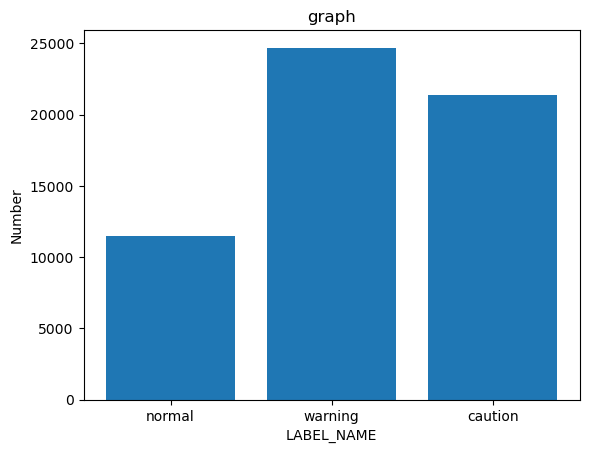

In [3]:
label_counts = {'정상': 0, '경고': 0, '주의': 0}

for label in y_label:
    label_counts[label] += 1

labels = list(label_counts.keys())
counts = list(label_counts.values())

print(counts)

plt.bar(['normal', 'warning', 'caution'], counts)
plt.xlabel('LABEL_NAME')
plt.ylabel('Number')
plt.title('graph')
plt.show()

In [13]:


data_indices = np.arange(len(x_label))

print(data_indices)

np.random.shuffle(data_indices)

print(data_indices)

x_label = np.array(x_label)[data_indices]
y_label = np.array(y_label)[data_indices]

x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.4, random_state=42)
# x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(len(x_train))
# print(len(x_valid))
print(len(x_test))

[    0     1     2 ... 57530 57531 57532]
[ 1305  8552 14292 ... 50349 38681 32326]
34519
23014


In [16]:
# x_train이 1차원이라면 2차원으로 변환
x_train = x_train.reshape(-1, 1)

label_mapping = {'정상': 0, '주의': 1, '경고': 2}
vectorized_mapping = np.vectorize(lambda x: label_mapping[x])
y_train = vectorized_mapping(y_train)
y_test = vectorized_mapping(y_test)

model = models.Sequential([
    layers.Dense(1, input_dim=x_train.shape[1], activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

# 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 모델 저장
model.save("model.h5")

# 테스트 데이터로 평가
accuracy = model.evaluate(x_test, y_test)[1]
print(f'Test Accuracy: {accuracy}')

KeyError: 0

In [ ]:
#sklearn
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(x_train.reshape(-1, 1), y_train)

y_pred = svm_model.predict(x_test.reshape(-1, 1))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9963065959850526


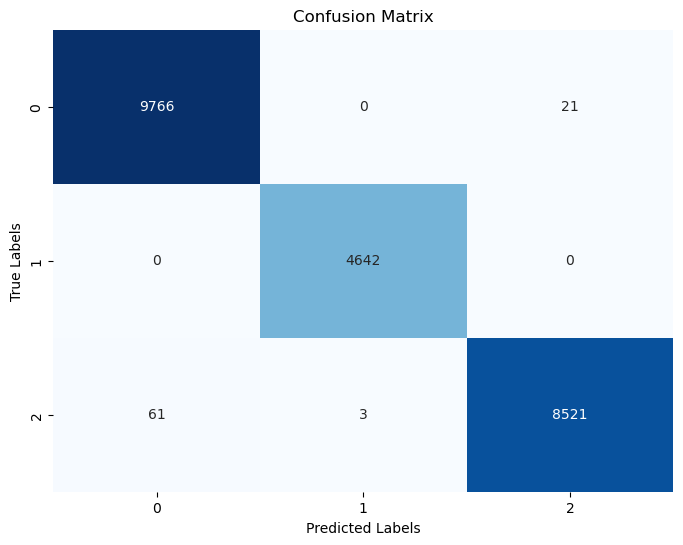

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

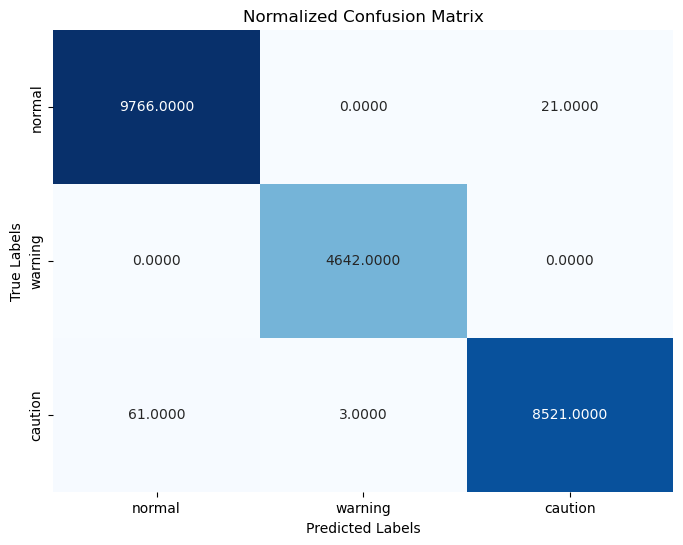

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.4f', cmap='Blues', cbar=False,xticklabels=['normal', 'warning', 'caution'], yticklabels=['normal', 'warning', 'caution'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
new_data = np.random.rand(1,16)*1.2

predictions = svm_model.predict(new_data.reshape(-1, 1))

print(new_data, predictions)

for i in range(0,16):
    print("---------------------------------------------------------------")
    print("new_data : ",new_data[0][i])
    print("pred_class : ",predictions[i])
    
print('-------------------------------------------------------------------')

[[0.23715833 0.48724076 0.58463744 0.97723773 1.11364992 0.92731545
  0.09688384 0.45369195 1.11662208 0.35550203 0.46489005 0.90657733
  0.219469   0.64819713 0.70905099 0.64458956]] ['경고' '경고' '경고' '정상' '정상' '정상' '경고' '경고' '정상' '경고' '경고' '정상' '경고' '주의'
 '주의' '주의']
---------------------------------------------------------------
new_data :  0.2371583347460294
pred_class :  경고
---------------------------------------------------------------
new_data :  0.48724075565265446
pred_class :  경고
---------------------------------------------------------------
new_data :  0.5846374412422114
pred_class :  경고
---------------------------------------------------------------
new_data :  0.9772377314303647
pred_class :  정상
---------------------------------------------------------------
new_data :  1.1136499160292566
pred_class :  정상
---------------------------------------------------------------
new_data :  0.9273154486707488
pred_class :  정상
------------------------------------------------------------